In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install scipy=="1.6.0"

     |████████████████████████████████| 27.4 MB 73.6 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import copy
import glob
import statistics
import pandas as pd
import numpy as np
import IPython
import seaborn as sns
from scipy import stats
from os.path import join
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

In [5]:
%cd /content/drive/MyDrive/BA/Notebooks/2_Experiment/Output_Reports
!ls

/content/drive/MyDrive/BA/Notebooks/2_Experiment/Output_Reports
faster_rcnn_mobilenetv3_large_320.csv
faster_rcnn_mobilenetv3_large.csv
faster_rcnn_resnet50.csv
old
ssd_vgg16.csv
testing_faster_rcnn_mobilenetv3_large_320.xlsx
testing_faster_rcnn_mobilenetv3_large.xlsx
testing_faster_rcnn_resnet50.xlsx
testing_ssd_vgg16.xlsx
welch_test_results.xlsx


In [6]:
OUTPUT_REPORTS = '/content/drive/MyDrive/BA/Notebooks/2_Experiment/Output_Reports'
# output_training_report = 'faster_rcnn_resnet50.csv'
output_testing_reports = ['testing_faster_rcnn_resnet50.xlsx', 'testing_faster_rcnn_mobilenetv3_large.xlsx', 'testing_faster_rcnn_mobilenetv3_large_320.xlsx', 'testing_ssd_vgg16.xlsx']

In [7]:
dfs = {}
for i, path in enumerate(output_testing_reports):
  model_name = path.replace('testing_', '').replace('.xlsx', '')
  df = pd.read_excel(join(OUTPUT_REPORTS, path))

  dfs[model_name] = {
    'standard' : df[df['image_version'] == 'standard'].copy(),
    'blurred' : df[df['image_version'] == 'blurred'].copy(),
    'contrast' : df[df['image_version'] == 'contrast'].copy(),
    'noisy' : df[df['image_version'] == 'noisy'].copy(),
    'sharp' : df[df['image_version'] == 'sharp'].copy(),
    'bright' : df[df['image_version'] == 'bright'].copy(),
    'dark' : df[df['image_version'] == 'dark'].copy()
  }

In [ ]:
df.head()

,Unnamed: 0,image_id,image_version,image_brightness_value,image_brightness_interpretation,image_rgb_avg_r,image_rgb_avg_g,image_rgb_avg_b,image_hsv_avg_h,image_hsv_avg_s,image_hsv_avg_v,object_brightness_value,object_brightness_interpretation,object_rgb_avg_r,object_rgb_avg_g,object_rgb_avg_b,object_hsv_avg_h,object_hsv_avg_s,object_hsv_avg_v,detected,confidence,object_size,object_class
0,0,0,standard,125.438453,dark,0.556038,0.467293,0.451009,0.292951,0.238228,0.574592,114.261806,dark,0.510820,0.423458,0.410804,0.290333,0.260023,0.536720,True,0.905784,51788,Bus
1,1,0,blurred,125.446009,dark,0.556079,0.467325,0.451038,0.293999,0.231639,0.573614,114.275629,dark,0.510881,0.423511,0.410863,0.289842,0.252075,0.535623,True,0.922264,51788,Bus
2,2,0,noisy,125.615649,dark,0.553813,0.469310,0.453319,0.316600,0.314915,0.603212,115.014874,dark,0.511053,0.427563,0.414961,0.315610,0.336217,0.567872,True,0.922264,51788,Bus
3,3,0,bright,197.716631,light,0.828842,0.757197,0.729331,0.159492,0.168023,0.843218,181.286088,light,0.763100,0.693487,0.664546,0.173925,0.191248,0.785763,True,0.892934,51788,Bus
4,4,0,contrast,122.150688,dark,0.574394,0.443042,0.414650,0.176440,0.349406,0.596431,104.536424,dark,0.507069,0.371283,0.354742,0.148328,0.355804,0.536515,True,0.997103,51788,Bus


# Detected

In [ ]:
print("ALL %DETECTED")
for model, df_versions in dfs.items():
  print(model)
  for version, df_version in df_versions.items():
    print(f'%detected - {version}:        \t {len(df_version[df_version["detected"] == True]) / len(df_version)} \t amount: {len(df_version[df_version["detected"] == True])}')
  print('='*69)

ALL %DETECTED
faster_rcnn_resnet50
%detected - standard:        	 0.6928348909657321 	 amount: 3336
%detected - blurred:        	 0.6446521287642782 	 amount: 3104
%detected - contrast:        	 0.6080996884735203 	 amount: 2928
%detected - noisy:        	 0.2600207684319834 	 amount: 1252
%detected - sharp:        	 0.7079958463136033 	 amount: 3409
%detected - bright:        	 0.6400830737279335 	 amount: 3082
%detected - dark:        	 0.6469366562824507 	 amount: 3115
faster_rcnn_mobilenetv3_large
%detected - standard:        	 0.7063343717549325 	 amount: 3401
%detected - blurred:        	 0.6778816199376947 	 amount: 3264
%detected - contrast:        	 0.636760124610592 	 amount: 3066
%detected - noisy:        	 0.6010384215991693 	 amount: 2894
%detected - sharp:        	 0.7032191069574247 	 amount: 3386
%detected - bright:        	 0.6469366562824507 	 amount: 3115
%detected - dark:        	 0.6826583592938733 	 amount: 3287
faster_rcnn_mobilenetv3_large_320
%detected - standa

In [ ]:
# %Detected bei den Objekte (nicht Bilder) wo Standard das Bild richtig ist
print("ONLY DETECTED OBJECTS")
for model, df_versions in dfs.items():
  print(model)
  df_standard = df_versions['standard']
  idxs = df_standard[df_standard['detected'] == True]['Unnamed: 0'].values
  for version, df_version in df_versions.items():
    df_detected = df_version[df_version['Unnamed: 0'].isin(idxs)]
    if len(df_detected) == 0:
      continue
    print(f'%detected - {version}:        \t {len(df_detected[df_detected["detected"] == True]) / len(df_detected)} \t amount: {len(df_detected[df_detected["detected"] == True])}')
  print('='*69)

ONLY DETECTED OBJECTS
faster_rcnn_resnet50
%detected - standard:        	 1.0 	 amount: 3336
faster_rcnn_mobilenetv3_large
%detected - standard:        	 1.0 	 amount: 3401
faster_rcnn_mobilenetv3_large_320
%detected - standard:        	 1.0 	 amount: 3022
ssd_vgg16
%detected - standard:        	 1.0 	 amount: 2744


In [8]:
le = None

results = []

for model, df_versions in dfs.items():
  df_standard = df_versions['standard']
  
  if le is None:
    le = preprocessing.LabelEncoder()
    le.fit(df_standard['detected'])
  
  standard_detected = le.transform(df_standard['detected'])

  for version, df_version in df_versions.items():
    if version == 'standard':
      continue
    alternative = 'greater'
    version_detected = le.transform(df_version['detected'])
    if version_detected.mean() > standard_detected.mean():
      alternative = 'less' 
    
   
    test_results = stats.ttest_ind(standard_detected, version_detected, equal_var = False, alternative = alternative)

    results.append(
        [
          model,
          version,
          version_detected.mean(),
          standard_detected.mean(),
          round(
              abs(standard_detected.mean() - version_detected.mean()) / ((standard_detected.mean() + version_detected.mean())/2) * 100, 4
          ),
          test_results.statistic,
          round(test_results.pvalue, 4),
          alternative
        ]
    )

df_detected_results = pd.DataFrame(results)
df_detected_results.columns = ['model', 'version', 'version_detected_mean', 'standard_detected_mean', 'percentage_diff', 'statistic', 'pvalue', 'standard is __ than version']
df_detected_results.sort_values(by = ['pvalue'], inplace = True)
df_detected_results.sort_values(by = ['percentage_diff'], ascending = False, inplace = True)
df_detected_results.reset_index(drop=True, inplace=True) 

for i in [True, False]:
  print(f'{i} -->  {le.transform([i])}')

True -->  [1]
False -->  [0]


In [11]:
df_detected_results[df_detected_results['standard is __ than version'] == 'less'].head(30)

,model,version,version_detected_mean,standard_detected_mean,percentage_diff,statistic,pvalue,standard is __ than version
21,faster_rcnn_resnet50,sharp,0.707996,0.692835,2.1646,-1.624002,0.0522,less
23,faster_rcnn_mobilenetv3_large_320,sharp,0.628453,0.627622,0.1323,-0.084326,0.4664,less


### Ergebnisse
- ResNet50 fällt sehr stark, wenn das Rauschen da ist
- ssd fällt minimal bei Rauschen
- SSD ist am schlechtesten bei hellen Bildern
- Mobilenet ist am schlechtesten bei noisy bildern, wobei die %detected alle ähnlich sind
-Mobilenet 320 ist auch am schlechtesten bei starken rauschen

# Object size

In [ ]:
df_standard = dfs[list(dfs.keys())[0]]['standard'] #get any standard
mean = round(df_standard['object_size'].mean() ** 0.5, 2)
std = round(df_standard['object_size'].std() ** 0.5, 2)
min = round(df_standard['object_size'].min() ** 0.5, 2)
max = round(df_standard['object_size'].max() ** 0.5, 2)
print(f'size of all objects:    \t\t\t mean: {mean} \t\t std: {std} \t\t min: {min} \t\t max: {max}')


for model, df_versions in dfs.items():
  print('='*131)
  print(model)
  for version, df_version in df_versions.items():
    mean = round(df_version[df_version['detected'] == True]['object_size'].mean() ** 0.5, 2)
    std = round(df_version[df_version['detected'] == True]['object_size'].std() ** 0.5, 2)
    min = round(df_version[df_version['detected'] == True]['object_size'].min() ** 0.5, 2)
    max = round(df_version[df_version['detected'] == True]['object_size'].max() ** 0.5, 2)
    print(f'size of detected - {version}:        \t\t mean: {mean}  \t\t std: {std} \t\t min: {min} \t\t max: {max}')
  

size of all objects:    			 mean: 156.2 		 std: 157.22 		 min: 4.24 		 max: 301.0
faster_rcnn_resnet50
size of detected - standard:        		 mean: 174.23  		 std: 159.34 		 min: 4.24 		 max: 301.0
size of detected - blurred:        		 mean: 179.23  		 std: 159.21 		 min: 5.66 		 max: 301.0
size of detected - contrast:        		 mean: 182.89  		 std: 159.38 		 min: 4.24 		 max: 301.0
size of detected - noisy:        		 mean: 196.45  		 std: 161.01 		 min: 7.0 		 max: 301.0
size of detected - sharp:        		 mean: 172.95  		 std: 159.53 		 min: 4.24 		 max: 301.0
size of detected - bright:        		 mean: 178.21  		 std: 159.03 		 min: 7.0 		 max: 301.0
size of detected - dark:        		 mean: 177.84  		 std: 159.59 		 min: 4.24 		 max: 301.0
faster_rcnn_mobilenetv3_large
size of detected - standard:        		 mean: 173.66  		 std: 158.87 		 min: 4.24 		 max: 301.0
size of detected - blurred:        		 mean: 176.2  		 std: 158.85 		 min: 4.24 		 max: 301.0
size of detected - contrast: 

### Ergebnisse
- bei allen Bildversionen nimmt die Objektgröße zu, wobei die Standardabweichung etwa gleich bleibt, d.h. kleinere Bilder (also auch die schwerere Aufgabe) fällt den Modellen schwerer
- Außnahme sind geschärfte Bilder

# Correlations

In [ ]:
df_corrs = []
col_models = []
for model, df_versions in dfs.items():
  corr = []
  col_names = []
  col_models.append(model)
  for version, df_version in df_versions.items():
    col_names.append(f'detected_{version}')
    corr.append(df_version.drop(columns = ['Unnamed: 0', 'image_id']).corr()[['detected']])
  df_tmp = pd.concat(corr, axis = 1).drop(index = ['detected'])
  # df_tmp.columns = [col_models, col_names]
  # df_tmp.set_index(model)
  df_corrs.append(df_tmp)
df_corr = pd.concat(df_corrs, axis = 1)
header = pd.MultiIndex.from_product([col_models,
                                     col_names],
                                    names=['model','version'])
df_corr.columns = header
df_corr.applymap(lambda x: x if abs(x) > 0.1 else '')

model                   faster_rcnn_resnet50                   \
version                    detected_standard detected_blurred   
image_brightness_value                                          
image_rgb_avg_r                                                 
image_rgb_avg_g                                                 
image_rgb_avg_b                                                 
image_hsv_avg_h                                                 
image_hsv_avg_s                                                 
image_hsv_avg_v                                                 
object_brightness_value                                         
object_rgb_avg_r                                                
object_rgb_avg_g                                                
object_rgb_avg_b                                                
object_hsv_avg_h                                                
object_hsv_avg_s                                                
object_hsv_avg_v                                                
confidence                          0.965225         0.961123   
object_size                         0.362025         0.420996   

model                                                                    \
version                 detected_contrast detected_noisy detected_sharp   
image_brightness_value                                                    
image_rgb_avg_r                                                           
image_rgb_avg_g                                                           
image_rgb_avg_b                                                           
image_hsv_avg_h                                                           
image_hsv_avg_s                                                           
image_hsv_avg_v                                                           
object_brightness_value           0.13985                                 
object_rgb_avg_r                 0.142313                                 
object_rgb_avg_g                 0.130306                                 
object_rgb_avg_b                 0.108414                                 
object_hsv_avg_h                                                          
object_hsv_avg_s                                                          
object_hsv_avg_v                 0.162783        0.10426                  
confidence                       0.959533       0.960241       0.960255   
object_size                      0.456083       0.340428       0.347277   

model                                                  \
version                 detected_bright detected_dark   
image_brightness_value                                  
image_rgb_avg_r                                         
image_rgb_avg_g                                         
image_rgb_avg_b                                         
image_hsv_avg_h                                         
image_hsv_avg_s                                         
image_hsv_avg_v                                         
object_brightness_value       -0.165362                 
object_rgb_avg_r               -0.14921                 
object_rgb_avg_g               -0.16181                 
object_rgb_avg_b               -0.15135                 
object_hsv_avg_h                                        
object_hsv_avg_s               0.108706                 
object_hsv_avg_v              -0.141404                 
confidence                      0.97086      0.962978   
object_size                    0.397095      0.395935   

model                   faster_rcnn_mobilenetv3_large                   \
version                             detected_standard detected_blurred   
image_brightness_value                                                   
image_rgb_avg_r                                                          
image_rgb_avg_g                                                          
image_rgb_avg_b                                                          
image_h

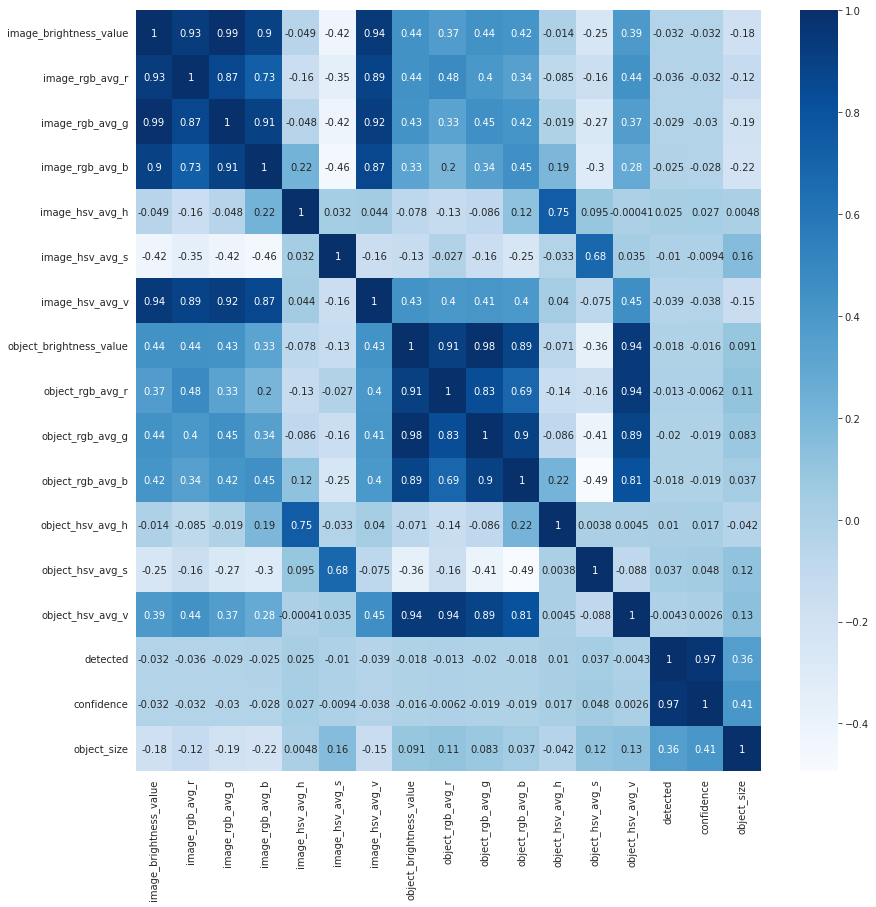

In [ ]:
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize=(14, 14))
  sns.heatmap(df_standard.drop(columns = ['Unnamed: 0', 'image_id', 'image_version']).corr(), cmap="Blues", annot=True)

# Hypothesis Tests

In [ ]:
# This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

# A p-value larger than a chosen threshold (e.g. 5% or 1%) indicates that our observation is not so unlikely to have occurred by chance.
# Therefore, we do not reject the null hypothesis of equal population means. 
# If the p-value is smaller than our threshold, then we have evidence against the null hypothesis of equal population means.



cols = ['image_brightness_value', 'image_brightness_interpretation', 'image_rgb_avg_r', 'image_rgb_avg_g', 'image_rgb_avg_b', 'image_hsv_avg_h', 'image_hsv_avg_s', 'image_hsv_avg_v', 'object_brightness_value', 'object_brightness_interpretation', 'object_rgb_avg_r', 'object_rgb_avg_g', 'object_rgb_avg_b', 'object_hsv_avg_h', 'object_hsv_avg_s', 'object_hsv_avg_v', 'object_size', 'object_class']

test_results = []
les = {}
for model, df_versions in dfs.items():
  for version, df_version in df_versions.items():
    for col in cols:
      detected = df_version[df_version['detected'] == True][col]
      not_detected = df_version[df_version['detected'] == False][col]
      if detected.values.dtype == 'O':
        if col not in les.keys():
          le = preprocessing.LabelEncoder()
          le.fit(detected)
          les[col] = [le, detected.unique()]
        detected = les[col][0].transform(detected)
        not_detected = les[col][0].transform(not_detected)
      
      test_result = stats.ttest_ind(detected, not_detected, equal_var = False)

      test_results.append(
          [
          model,
          version,
          col,
          round(test_result.statistic, 4),
          round(test_result.pvalue, 4),
          round(np.concatenate((detected, not_detected)).mean(), 4),
          round(detected.mean(), 4),
          round(not_detected.mean(), 4),
          round(
              abs(detected.mean() - not_detected.mean()) / ((detected.mean() + not_detected.mean())/2) * 100, 4
          )
          ] 
      )

for col, values in les.items():
  le = values[0]
  print(f'{col}: {values[1]} -->  {le.transform(values[1])}')

df_test_results = pd.DataFrame(test_results)
df_test_results.columns = ['model', 'version', 'variable', 'statistic', 'pvalue', 'mean_total', 'mean_detected', 'mean_not_detected', 'percentage_diff']
df_test_results.sort_values(by = ['pvalue'], inplace = True)
df_test_results.sort_values(by = ['percentage_diff'], ascending = False, inplace = True)
df_test_results.reset_index(drop=True, inplace=True) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


image_brightness_interpretation: ['dark' 'light'] -->  [0 1]
object_brightness_interpretation: ['dark' 'light'] -->  [0 1]
object_class: ['Bus' 'Truck'] -->  [0 1]


In [ ]:
df_test_results[(df_test_results['percentage_diff'] > 0)].to_excel(join(OUTPUT_REPORTS, 'welch_test_results.xlsx'), index = False)#.head(30) # & (~df_test_results['variable'].isin(['object_size', 'object_brightness_interpretation', 'object_brightness_value', 'object_class', 'image_brightness_interpretation']))].head()

### Ergebnisse
#### Object Brigthness
- 0: dark
- 1: light/bright
- Es werden signifikant mehr helle Bilder durch Modelle nicht erkannt
 - liegt das an der Helligkeit oder dorch an z.B. der Objektgröße
 - correlation matrix zeigt ähnliches Phänomen
 - Sättigung ist auch signifikant unabhängig
- image brightness ist tatsächlich vom Durchschnitt her ähnlich bei detected und nicht detetected
#### Object class
- 0: Bus
- 1: Truck
- vor allem bei noisy und blurred sind die Abweichungen der beiden Werte noch relativ groß
#### Farbe
- Objekt Farben sind für Unterscheidung relevanter als Bildfarben
- 

In [ ]:
# df_test_results['model'].replace('_', ' ', regex=True, inplace = True)
# print(df_test_results[(df_test_results['pvalue'] < 0.01)].head(100).to_markdown(index = False))
# https://tableconvert.com/markdown-to-latex

# Recognition of classes

In [ ]:
df_classes = []

for model, df_versions in dfs.items():
  for version, df_version in df_versions.items():
    detected_bus = len(df_version[(df_version['detected'] == True) & (df_version['object_class'] == 'Bus')])
    mean_bus = df_version[(df_version['detected'] == True) & (df_version['object_class'] == 'Bus')]['confidence'].mean()
    total_bus = len(df_version[df_version['object_class'] == 'Bus'])

    detected_truck = len(df_version[(df_version['detected'] == True) & (df_version['object_class'] == 'Truck')])
    mean_truck = df_version[(df_version['detected'] == True) & (df_version['object_class'] == 'Truck')]['confidence'].mean()
    total_truck = len(df_version[df_version['object_class'] == 'Truck'])

    df_classes.append(
        [
         model, 
         version,
         round(detected_bus / total_bus, 4),
         total_bus,
         mean_bus,
         round(detected_truck / total_truck, 4),
         total_truck,
         mean_truck,
         (detected_bus / total_bus) > (detected_truck / total_truck)
        ]
    )
df_cls = pd.DataFrame(df_classes)
df_cls.columns = ['model', 'version', 'detected_bus', 'total_bus', 'mean_bus', 'detected_truck', 'total_truck', 'mean_truck', 'bus>truck']

In [ ]:
df_cls.head()

,model,version,detected_bus,total_bus,mean_bus,detected_truck,total_truck,mean_truck,bus>truck
0,faster_rcnn_resnet50,standard,0.7285,2313,0.970288,0.6599,2502,0.939200,True
1,faster_rcnn_resnet50,blurred,0.6909,2313,0.966460,0.6019,2502,0.923257,True
2,faster_rcnn_resnet50,contrast,0.6442,2313,0.949523,0.5747,2502,0.925608,True
3,faster_rcnn_resnet50,noisy,0.1699,2313,0.806899,0.3433,2502,0.880655,False
4,faster_rcnn_resnet50,sharp,0.7272,2313,0.964267,0.6902,2502,0.939420,True


### Ergebnisse
- %detected ist auf beiden Seiten ähnlich
- Es gibt keine Klasse, die viel häufiger als die andere entdeckt wurde

# Number of objects

In [ ]:
df_objects = []

for model, df_versions in dfs.items():
  image_ids = df_version['image_id'].unique()  #recheck line
  for version, df_version in df_versions.items():
    for image_id in image_ids:
      
      detected_bus = len(df_version[(df_version['image_id'] == image_id) & (df_version['object_class'] == 'Bus') & (df_version['detected'] == True)])
      detected_bus_size_mean = round(df_version[(df_version['image_id'] == image_id) & (df_version['object_class'] == 'Bus') & (df_version['detected'] == True)]['object_size'].mean(), 2)
      total_bus = len(df_version[(df_version['image_id'] == image_id) & (df_version['object_class'] == 'Bus')])
      total_bus_size_mean = round(df_version[(df_version['image_id'] == image_id) & (df_version['object_class'] == 'Bus')]['object_size'].mean(), 2)
      
      detected_truck = len(df_version[(df_version['image_id'] == image_id) & (df_version['object_class'] == 'Truck') & (df_version['detected'] == True)])
      detected_truck_size_mean = round(df_version[(df_version['image_id'] == image_id) & (df_version['object_class'] == 'Truck') & (df_version['detected'] == True)]['object_size'].mean(), 2)
      total_truck = len(df_version[(df_version['image_id'] == image_id) & (df_version['object_class'] == 'Truck')])
      total_truck_size_mean = round(df_version[(df_version['image_id'] == image_id) & (df_version['object_class'] == 'Truck')]['object_size'].mean(), 2)

      total_detected_size_mean = round(df_version[(df_version['image_id'] == image_id) & (df_version['detected'] == True)]['object_size'].mean(), 2)
      total_size_mean = round(df_version[df_version['image_id'] == image_id]['object_size'].mean(), 2)


      df_objects.append(
          [
           model,
           version,
           image_id,
           detected_bus,
           detected_bus_size_mean,
           total_bus,
           total_bus_size_mean,
           detected_truck,
           detected_truck_size_mean,
           total_truck,
           total_truck_size_mean,
           detected_bus + detected_truck,
           total_detected_size_mean,
           total_bus + total_truck,
           total_size_mean
          ]
      )
df_obj = pd.DataFrame(df_objects)
df_obj.columns = ['model', 'version', 'image_id', 'detected_bus', 'detected_bus_size_mean', 'total_bus', 'total_bus_size_mean', 'detected_truck', 'detected_truck_size_mean', 'total_truck', 'total_truck_size_mean', 'total_detected', 'total_detected_size_mean', 'total', 'total_size_mean']
                

df_obj.sort_values(by = ['total', 'total_truck'], ascending = False, inplace = True)
df_obj.fillna(0, inplace = True)

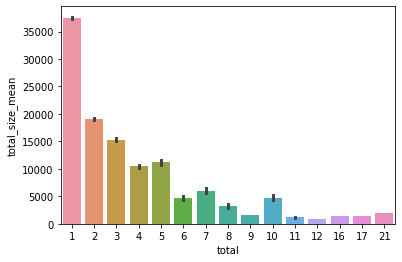

In [ ]:
s1 = sns.barplot(data=df_obj, x='total', y='total_size_mean')
s2 = s1 = sns.barplot(data=df_obj, x='total', y='total_size_mean')

In [ ]:
df_obj_group = df_obj.groupby(by = ['model', 'version', 'total']).sum()
df_obj_group.reset_index(inplace = True)

In [ ]:
df_obj_group.head()

,model,version,total,image_id,detected_bus,detected_bus_size_mean,total_bus,total_bus_size_mean,detected_truck,detected_truck_size_mean,total_truck,total_truck_size_mean,total_detected,total_detected_size_mean,total_size_mean
0,faster_rcnn_mobilenetv3_large,blurred,1,3178297,827,34562323.00,918,36574564.00,1030,37126778.00,1159,41288235.00,1857,71689101.00,77862799.00
1,faster_rcnn_mobilenetv3_large,blurred,2,824933,353,8230754.50,562,6329144.00,333,5857912.00,560,4994056.00,686,14021638.00,10724402.00
2,faster_rcnn_mobilenetv3_large,blurred,3,372129,217,3936460.66,411,2438865.18,132,1977273.01,288,1355176.21,349,5830889.67,3575106.72
3,faster_rcnn_mobilenetv3_large,blurred,4,135562,111,933593.17,226,740312.50,53,506043.83,142,287121.25,164,1439637.00,961312.50
4,faster_rcnn_mobilenetv3_large,blurred,5,67142,44,426387.32,95,248734.40,33,445105.67,115,299434.70,77,864082.99,469129.80


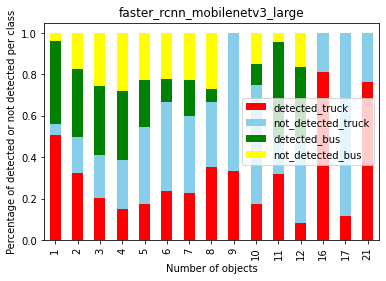

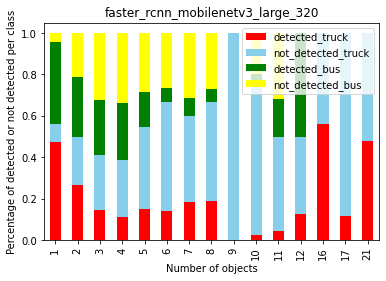

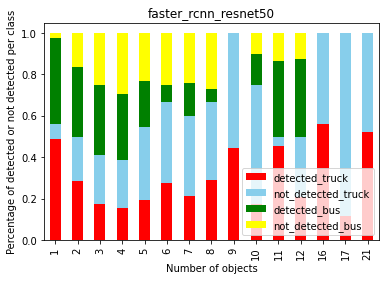

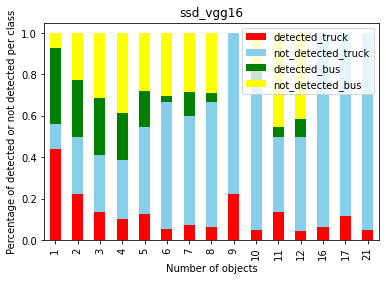

In [ ]:
for model in df_obj_group['model'].unique():

  df_model = df_obj_group[(df_obj_group['model'] == model) & (df_obj_group['version'] == 'standard')]

  totals = (df_model['total_bus'] + df_model['total_truck'])

  detected_truck = df_model['detected_truck'] / totals
  not_detected_truck = (df_model['total_truck'] - df_model['detected_truck']) / totals

  detected_bus = df_model['detected_bus'] / totals
  not_detected_bus = (df_model['total_bus'] - df_model['detected_bus']) / totals

  df_nr_objects = pd.DataFrame({
      'detected_truck': detected_truck.values,
      'not_detected_truck': not_detected_truck.values,
      'detected_bus': detected_bus.values,
      'not_detected_bus': not_detected_bus.values
      },
      index = df_model['total'].unique()
  )
  df_nr_objects.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green', 'yellow'])
  plt.xlabel('Number of objects');
  plt.ylabel('Percentage of detected or not detected per class');
  plt.title(model);

In [ ]:
# X-Achse Anzahl Bilder pro Bild
# Y-Achse Objetgröße

In [ ]:
image_counts = []
obj_sizes = []
for index, row in df_standard.iterrows():
  img_id = row['image_id']
  img_count = len(df_standard[df_standard['image_id'] == img_id])
  image_counts.append(img_count)
  obj_sizes.append(row['object_size'])

In [ ]:
comp_size = pd.DataFrame([image_counts, obj_sizes]).T.groupby(by = [0]).mean()
sizes = comp_size[1].values
counts = comp_size[1].index.values

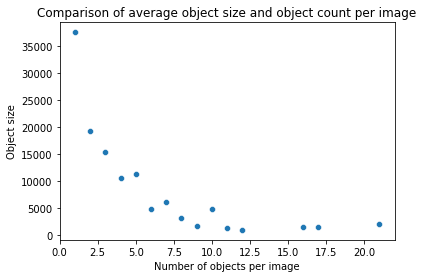

In [ ]:
ax = sns.scatterplot(x='image_counts', y='obj_sizes', data = pd.DataFrame.from_dict({'image_counts': counts, 'obj_sizes': sizes}));
plt.title('Comparison of average object size and object count per image');
plt.xlabel('Number of objects per image');
plt.ylabel('Object size');